# Car Insurance Risk Project 🚘

The idea of this project is to predict the insurance risk rating of a car as well as characterizing the 
different segments of the population.  

### 1. EDA
To begin with the project, we'll perform data cleaning and exploratory data analysis (EDA) on the provided dataset. This will include checking for data quality issues, visualizing the data, and extracting insights from it.

### 1.1 Data Quality

In this section, the focus will be on assessing the integrity of the data, ensuring that it is clean and consistent for analysis. 
Steps will include:

- Identifying Missing Data: We will search for any missing or incomplete data points and handle them appropriately (e.g., replacing them with median values or removing affected rows).
- Checking for Duplicates: Any duplicated rows will be identified and removed to prevent bias in the analysis.
- Data Type Correction: Ensuring that each column has the appropriate data type, converting strings to numbers where necessary.
- Outliers: We will identify and handle outliers that could skew the analysis using visualization techniques such as box plots.

1.1.1 Importing Libraries and Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
import xgboost as xgb

1.1.2 Data Collection and information

In [2]:
def import_data(file_path, columns):
    """
    Function with the responsibility to import the data from the file.
    """
    try:
        data = pd.read_csv(file_path, names=columns)
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Constants
file_path = '../data/imports-85.csv'
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
              'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
                'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Import the data
df = import_data(file_path, columns)

# Showing or Checking results
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
def dfInformation(dataframe):
    """
    Gets the initial information of the Dataset, the number of records, number of variables, non-null objects and data type.

    Args:
        dataframe (DataFrame): Source dataset.
    
    Returns:
        void: A range indes conforma by float64(2), int64(1), object(6)

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    dataframe.info()
dfInformation(df)
# Getting the shape of the dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

(205, 26)

In [4]:
# Getting all the unique values in the make column
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [5]:
# Getting duplicate rows
duplicated = df[df.duplicated()]
print(f"There are {len(duplicated)} duplicated values in dataframe")

There are 0 duplicated values in dataframe


1.1.3 Identifying Missing Data

In [6]:
def check(dataframe):
    """
    Gets the amount of null data and unique is calculated

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        DataFrame: A new Dataframe tha represents de amortized values of null and unique values for each column.

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    l=[]
    columns=dataframe.columns
    for col in columns:
        dtypes=dataframe[col].dtypes
        nunique=dataframe[col].nunique()
        sum_null=dataframe[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['Column','Types','Unique','Nulls']
    return df_check 
check(df)

,Column,Types,Unique,Nulls
0,symboling,int64,6,0
1,normalized-losses,object,52,0
2,make,object,22,0
3,fuel-type,object,2,0
4,aspiration,object,2,0
5,num-of-doors,object,3,0
6,body-style,object,5,0
7,drive-wheels,object,3,0
8,engine-location,object,2,0
9,wheel-base,float64,53,0


In [7]:
def checkDuplicates(dataframe):
    """
    Checks duplicated values for each column and amortized this count.

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        int: The total of duplicated values in an specifica dataframe

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    return dataframe.duplicated().sum()
checkDuplicates(df)

np.int64(0)

All looks like there are no missing values in the dataset. However, we can see that some columns have special characters that need to be removed.

In [8]:
def removeSymbols(dataframe):
    """
    Removes the symbols from the dataset.

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        DataFrame: A new Dataframe without the symbols.

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    dataframe = dataframe.replace('?', np.nan)
    return dataframe

# Removing the symbols
df = removeSymbols(df)

In [9]:
# Categorical columns
categorical_columns = ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                        'engine-type', 'num-of-cylinders', 'fuel-system']

# Numerical columns
numerical_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
                        'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# All numerical columns pass to float or int
df[numerical_columns] = df[numerical_columns].astype(float)

In [10]:
# Rechecking the data
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


### 2. Data Visualization
Visualizations will help uncover relationships between car characteristics and insurance risk. The focus here includes:

- Distribution of Features: Visualizing the distribution of important car attributes (e.g., engine size, body style) using histograms and bar charts to understand their spread across the dataset.
- Correlations: Create a heatmap to identify how different features (e.g., engine size, fuel type, and price) are correlated with each other and with the insurance risk rating.
- Feature-Target Visualization: Use box plots and scatter plots to visually analyze how each feature relates to the car's risk rating, helping to identify patterns.

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

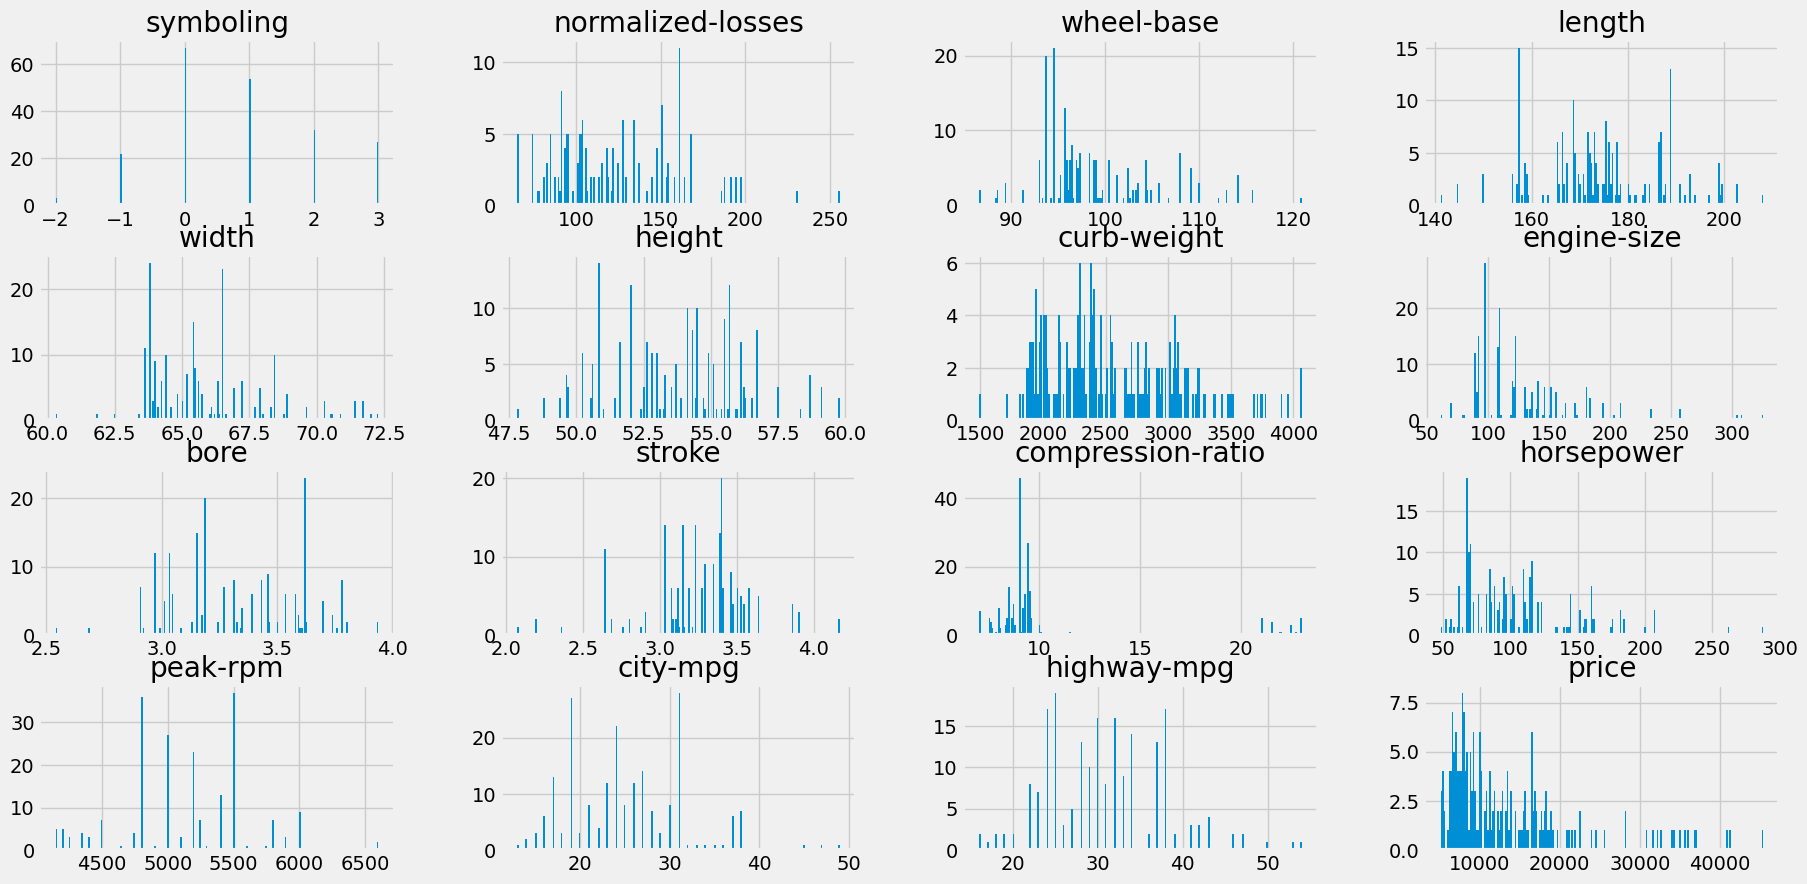

In [11]:
# Dataframe histogram
df.hist(bins=200,figsize=[20,10])

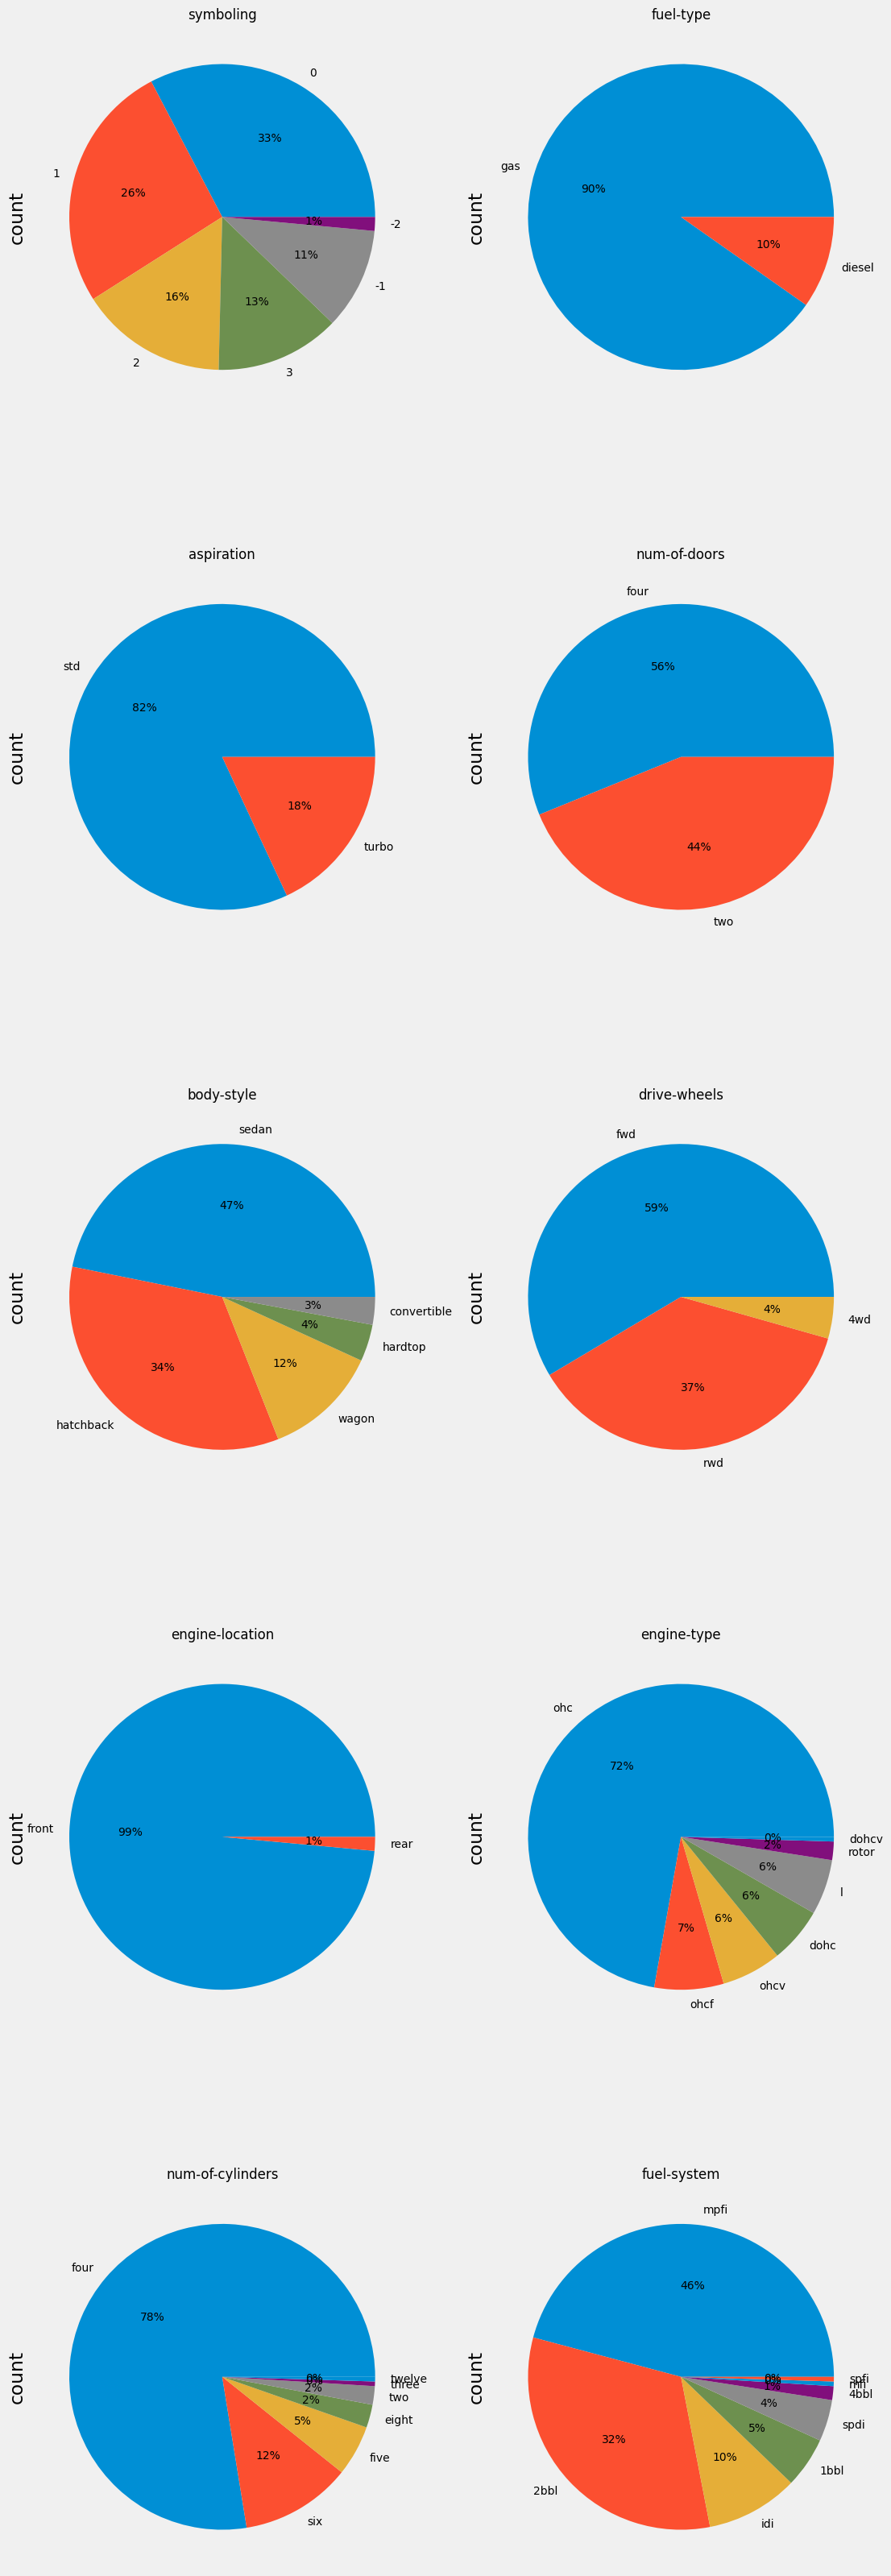

In [12]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(12, 40), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

# Columns list
cols_list = ['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
# Pie plot
pie_plot(df, cols_list, 5, 2)

Text(0, 0.5, 'Count of Cars')

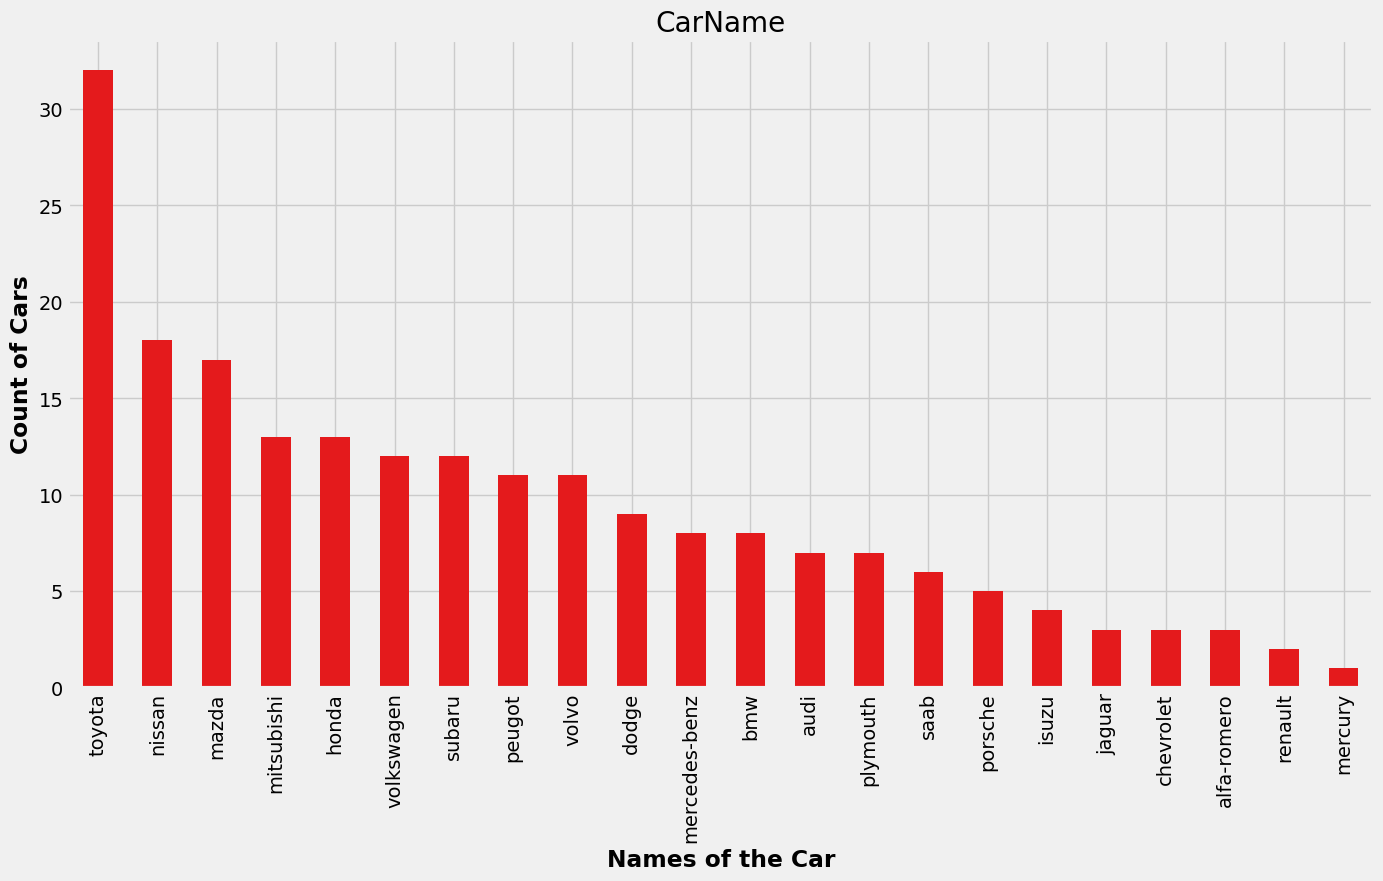

In [13]:
# Visualizing the different makes available

plt.rcParams['figure.figsize'] = [15,8]
ax=df['make'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

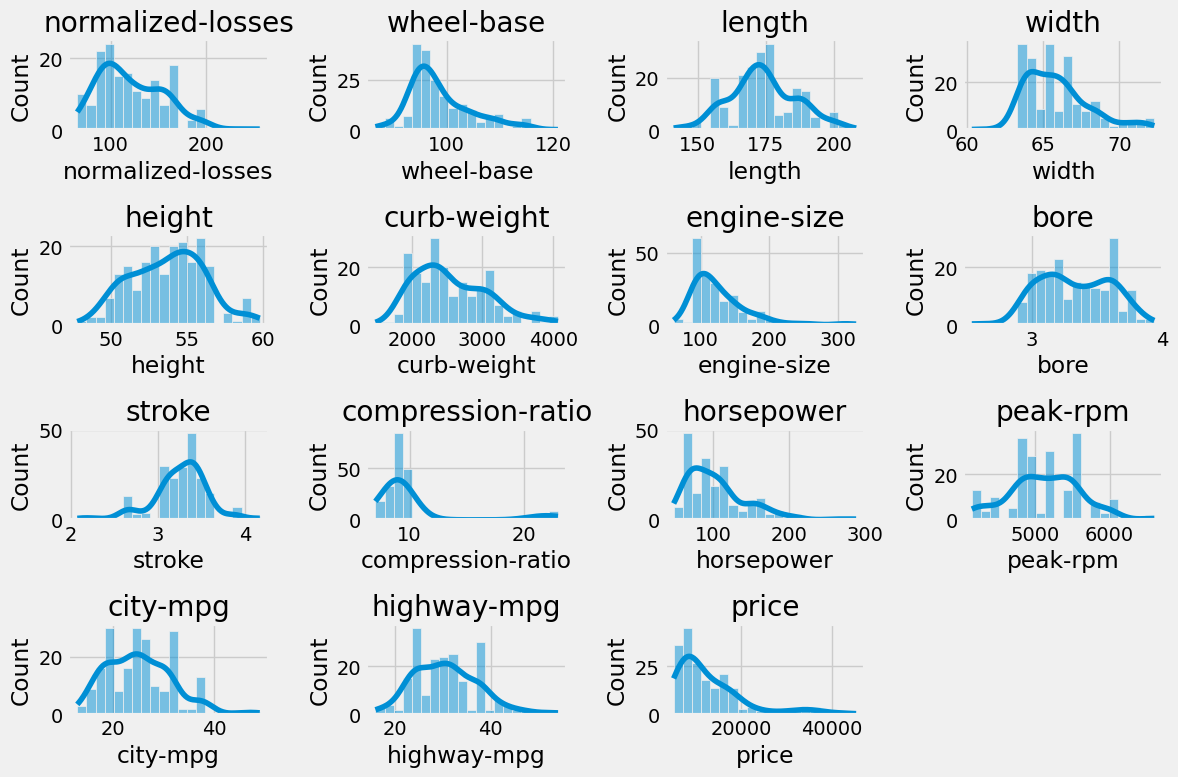

In [14]:
# Visualizing the numerical columns
plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(4, 4, numerical_columns.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

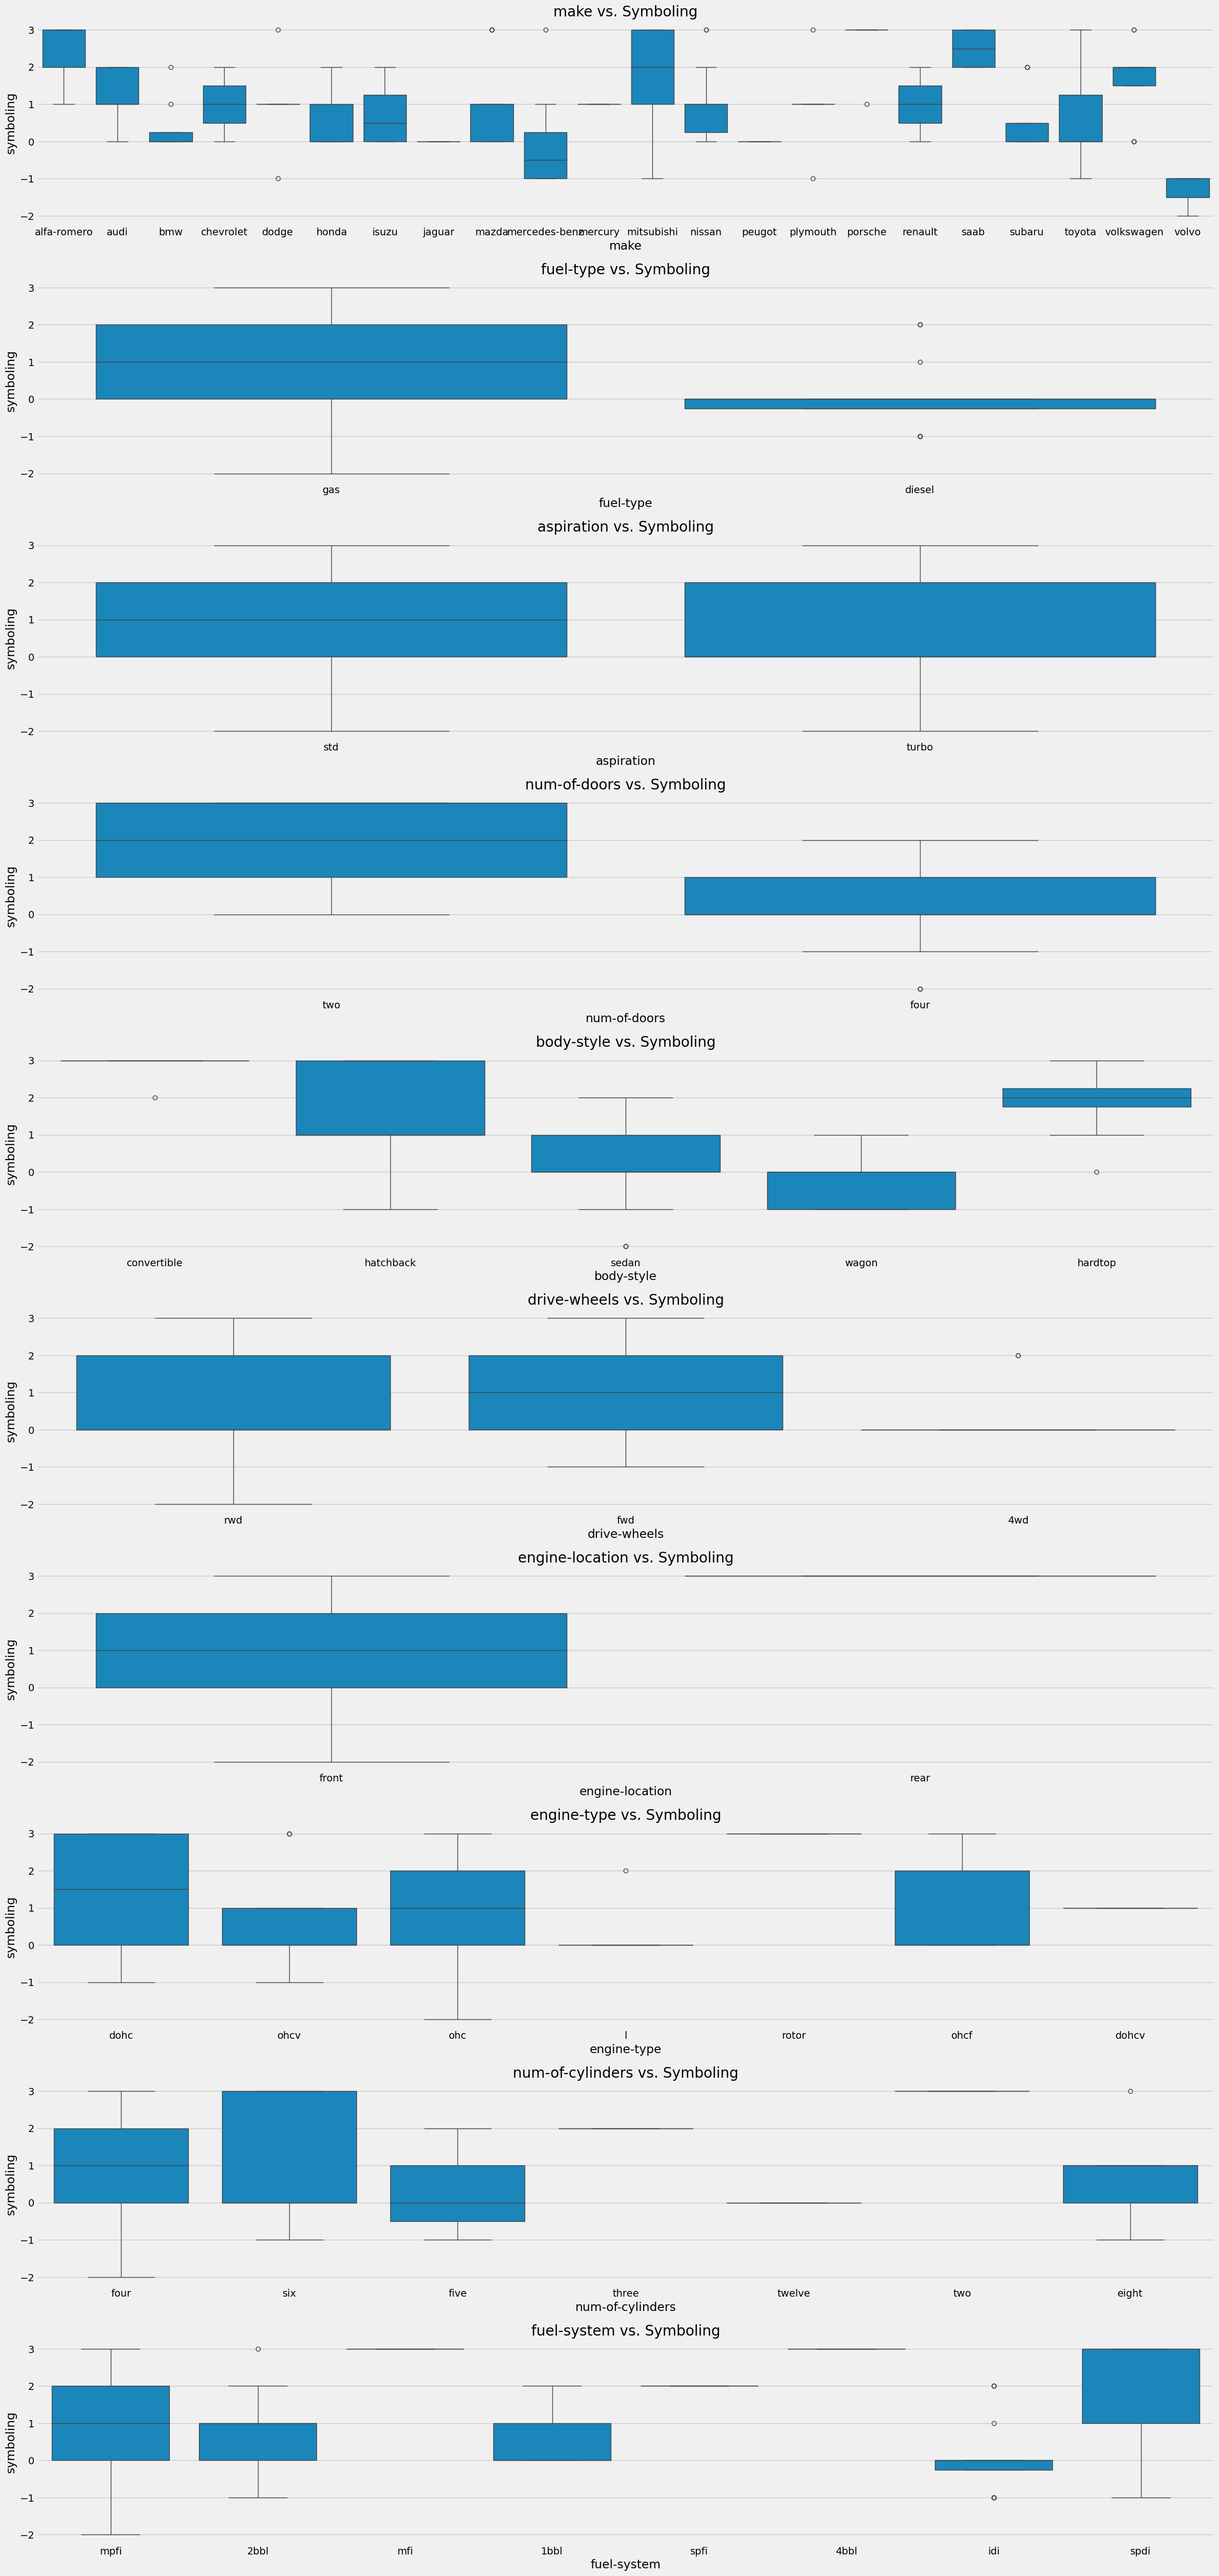

In [15]:
# Categorical Feature vs. symboling
plt.figure(figsize=(24, 60))
slice = categorical_columns[1:]
for feature in slice:
    plt.subplot(12, 1, slice.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='symboling')
    plt.title(f'{feature} vs. Symboling')
plt.tight_layout()
plt.show()

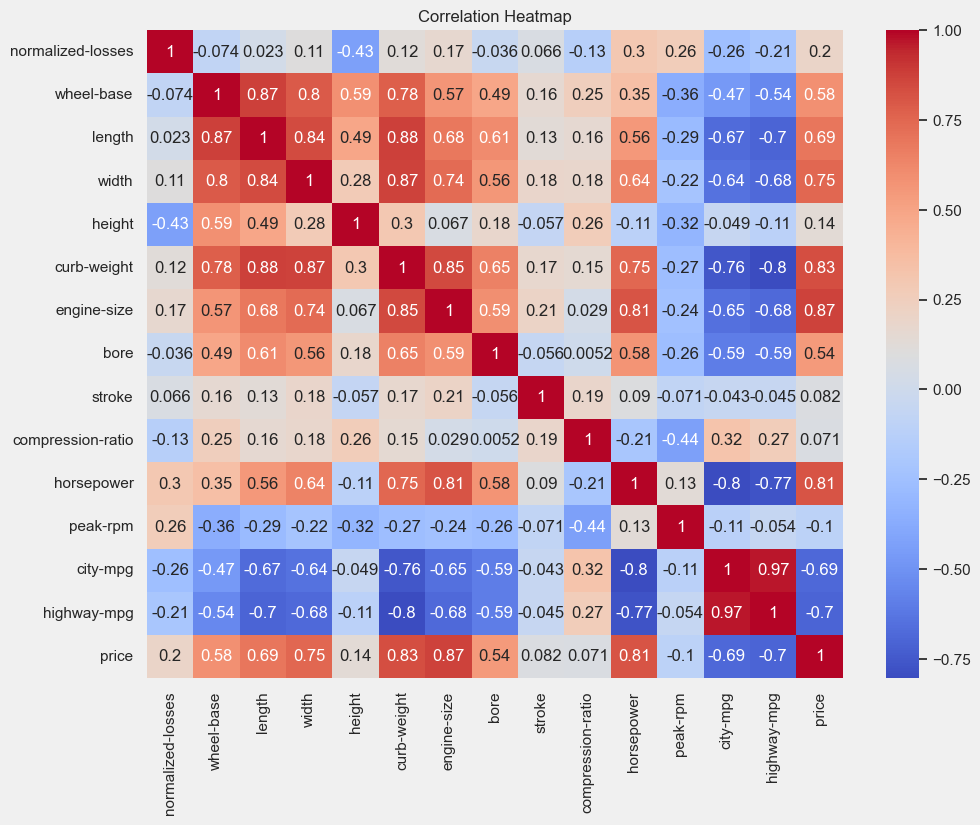

In [16]:
# Correlation Analysis
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
# Adjust font size
sns.set(font_scale=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 3. Extraction of Insights
This section focuses on extracting actionable insights to inform risk prediction and characterize segments. Steps include:

#### Summary Statistics

##### Car Variety:
* Dataset covers 205 car models, each unique in attributes.
* Sizes, weights, and engine capacities vary across cars.

##### Engine type:

* Engines differ in bore diameter (boreratio) and stroke length (stroke).
* Risk ratings (symboling) vary from -3 to 3. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe

##### Price Range:
* Minimum Price: $5,118 dollars
* Maximum Price: $45,400 dollars
* Average car price is about: $13,276 dollars. The relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

##### Data distribution:
* Features like carwidth, curbweight, enginesize show notable variability.
* Potential outliers present in compressionratio and horsepower.


#### Feature Importance for Risk Prediction:
* CarName: Make and model of car
* Drivewheel: Car drive wheel (rear wheel drive, 4 wheel drive or front wheel drive)
* Doornumber: Number of car doors (two or four)
* Enginelocation: Location of car engine (front of rear)
* Fuelsystem: Type of car fuel system (1bbl, 2 bbl, 4 bbl, idi, mfi, mpfi, spdi, or spfi)
* Fueltype: Car Fuel Type (gas or diesel)
* Price: total price of car in dollars
* Stroke: Car strokes (numerical value in strokes)
* Symboling: Acturian assessment of risk of the car (numerical values where -3 is safe, +3 is risky)


Insights
- The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
- All the types of carbody is relatively cheaper as compared to convertible carbody.
- The cars with rear enginelocation are way expensive than cars with front enginelocation.
- The price of car is directly proportional to no. of cylinders in most cases.
- Enginetype ohcv comes into higher price range cars.
- DoorNumber isn't affecting the price much.
- HigerEnd cars seems to have rwd drivewheel

### 4. Understanding and Cleaning of Data

In this section, we focus on understanding the structure and content of the dataset, identifying any inconsistencies or missing values, and applying appropriate cleaning techniques to prepare the data for analysis. This involves:

- Data Exploration: Investigate the dataset's structure, including the number of rows and columns, data types, and unique values in each column.
- Data Cleaning: Address any data quality issues, such as missing values, duplicates, or incorrect data types, to ensure the dataset is clean and consistent.
- Data Transformation: Normalize or scale the data as needed to ensure all features are on a similar scale for modeling.


#### 4.1 Identifying categorical and numerical columns

In [17]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)
print(f"There are {len(numerical)} numerical columns:")
print(numerical)
print(f"There are {len(categorical)} categorical columns:")
print(categorical)

There are 16 numerical columns:
['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
There are 10 categorical columns:
['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [18]:
def check(dataframe):
    l=[]
    columns=dataframe.columns
    for col in columns:
        dtypes=dataframe[col].dtypes
        nunique=dataframe[col].nunique()
        sum_null=dataframe[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['Column','Types','Unique','Nulls']
    return df_check
check(df)

,Column,Types,Unique,Nulls
0,symboling,int64,6,0
1,normalized-losses,float64,51,41
2,make,object,22,0
3,fuel-type,object,2,0
4,aspiration,object,2,0
5,num-of-doors,object,2,2
6,body-style,object,5,0
7,drive-wheels,object,3,0
8,engine-location,object,2,0
9,wheel-base,float64,53,0


#### 4.2 Data Cleaning due to special characters removed in previous steps

In [19]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<Axes: >

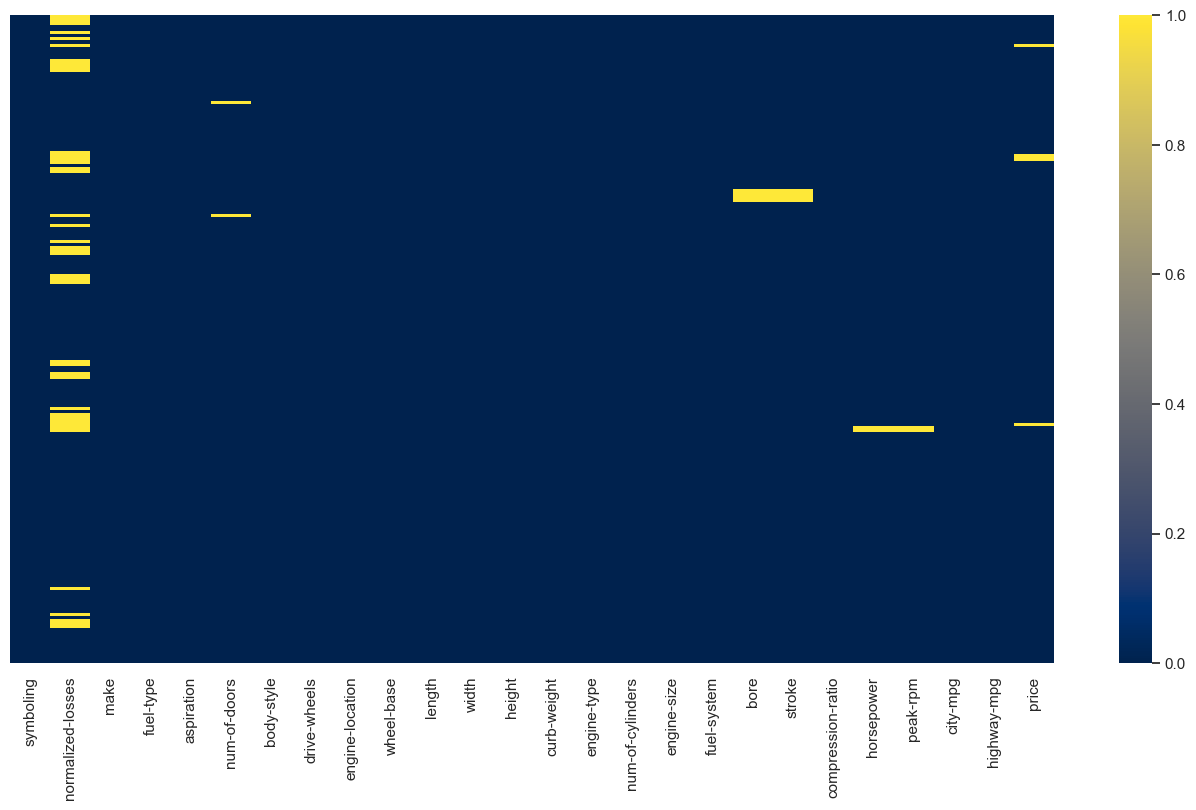

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='cividis')

/var/folders/ml/jw4fkwpd5pl0zq651sqzfz3c0000gn/T/ipykernel_6869/990051494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='normalized_losses_na', data=null_count_by_make, palette='viridis')


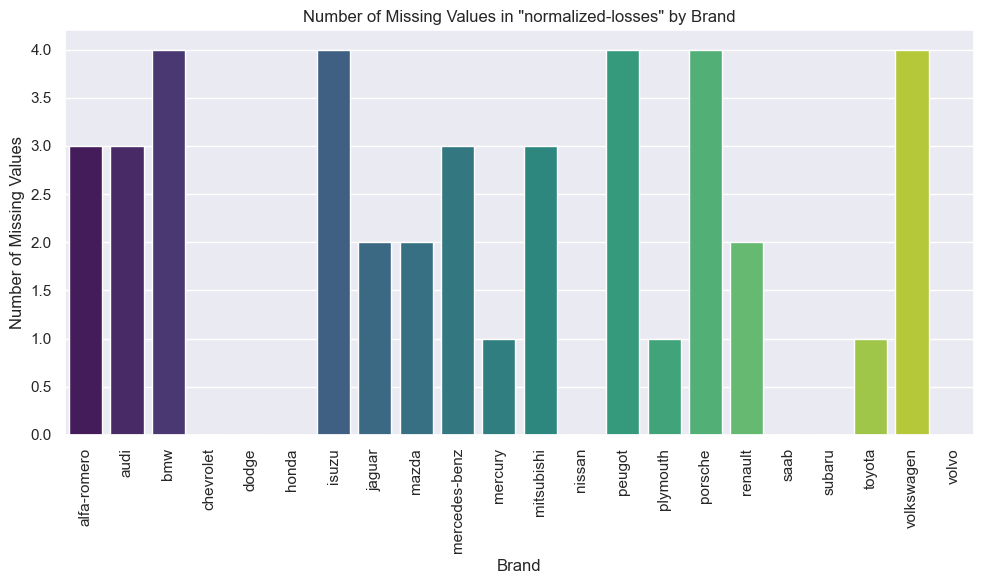

In [21]:
df['normalized_losses_na'] = df['normalized-losses'].isna().astype(int)

# Count how many missing values each brand has in 'make'
null_count_by_make = df.groupby('make')['normalized_losses_na'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='make', y='normalized_losses_na', data=null_count_by_make, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Missing Values in "normalized-losses" by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Missing Values')

# Display the plot
plt.tight_layout()
plt.show()

#### 4.3 Detecting and Handling Outliers

In [22]:
def detect_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # If there are outliers, print how many and which ones
    if not outliers.empty:
        print(f"\nOutliers in the column '{column}':")
        print(f"Number of outliers: {len(outliers)}")
        print(outliers[['symboling', column]])  # Only show the column with outliers and the identifier
    else:
        print(f"No outliers found in the column '{column}'")

# List of numeric columns
numerical_columns = ['symboling', 'wheel-base', 'length', 'width', 'height',
                     'curb-weight', 'engine-size', 'compression-ratio',
                     'city-mpg', 'highway-mpg']

# Iterate over the numeric columns to detect outliers
for column in numerical_columns:
    detect_outliers(df, column)

No outliers found in the column 'symboling'

Outliers in the column 'wheel-base':
Number of outliers: 3
    symboling  wheel-base
70         -1       115.6
71         -1       115.6
73          0       120.9

Outliers in the column 'length':
Number of outliers: 1
    symboling  length
18          2   141.1

Outliers in the column 'width':
Number of outliers: 8
     symboling  width
6            1   71.4
7            1   71.4
8            1   71.4
70          -1   71.7
71          -1   71.7
73           0   71.7
74           1   72.0
129          1   72.3
No outliers found in the column 'height'
No outliers found in the column 'curb-weight'

Outliers in the column 'engine-size':
Number of outliers: 10
    symboling  engine-size
15          0        209.0
16          0        209.0
17          0        209.0
47          0        258.0
48          0        258.0
49          0        326.0
71         -1        234.0
72          3        234.0
73          0        308.0
74          1       

#### 4.4 Removing Outliers

In [23]:
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers less this specific columns: width, compression-ratio and engine-size
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] if column not in ['width', 'compression-ratio', 'engine-size'] else df

    return df_cleaned

# Create a copy of the original DataFrame
df_cleaned = df.copy()

# Iterate over the numeric columns to remove the outliers
for column in numerical_columns:
    df_cleaned = remove_outliers(df_cleaned, column)

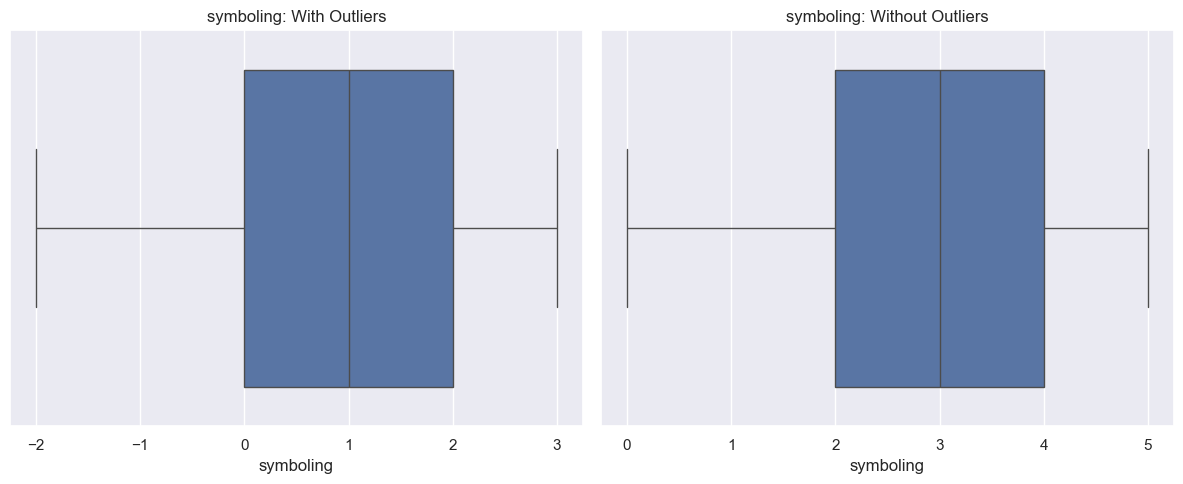

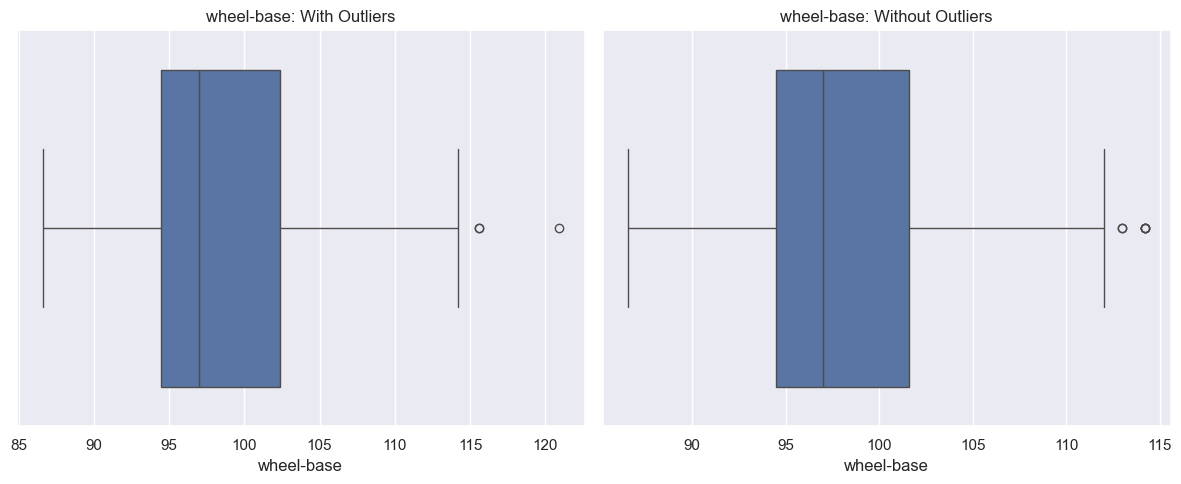

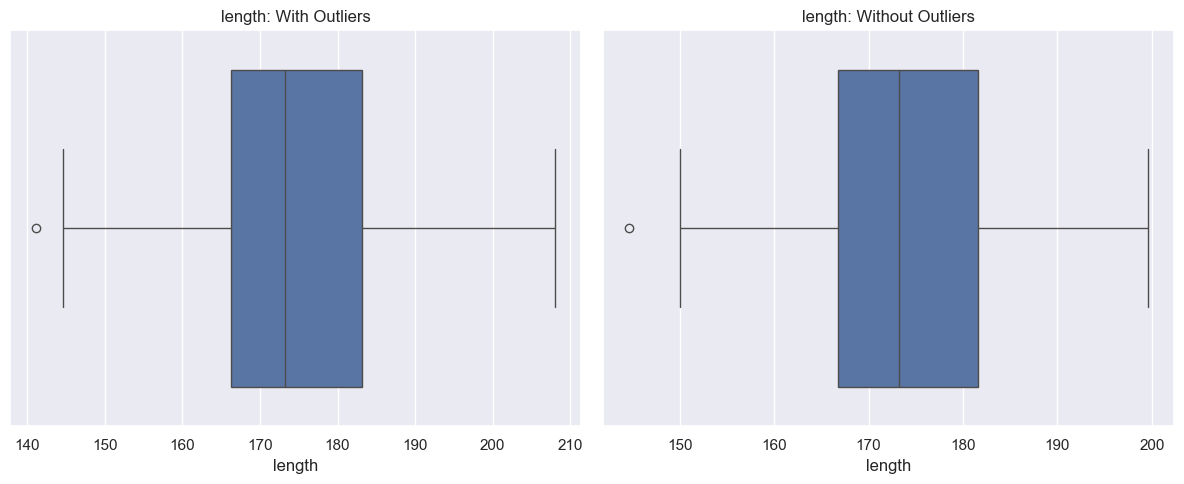

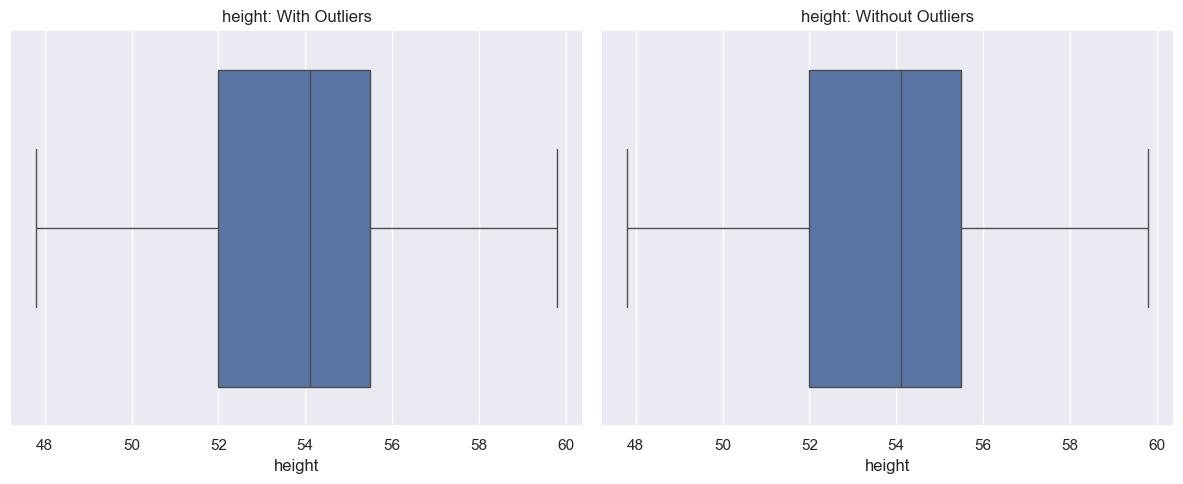

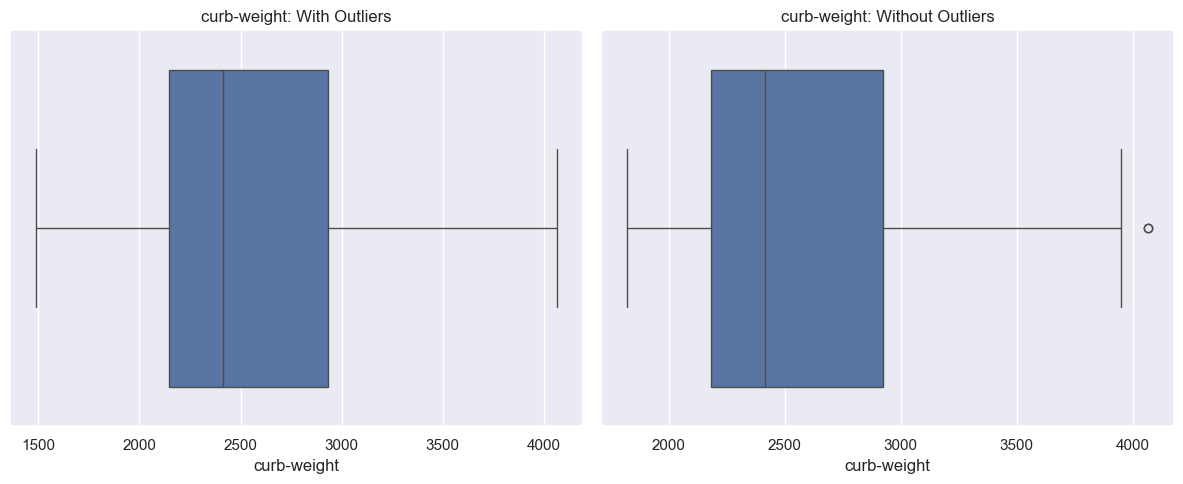

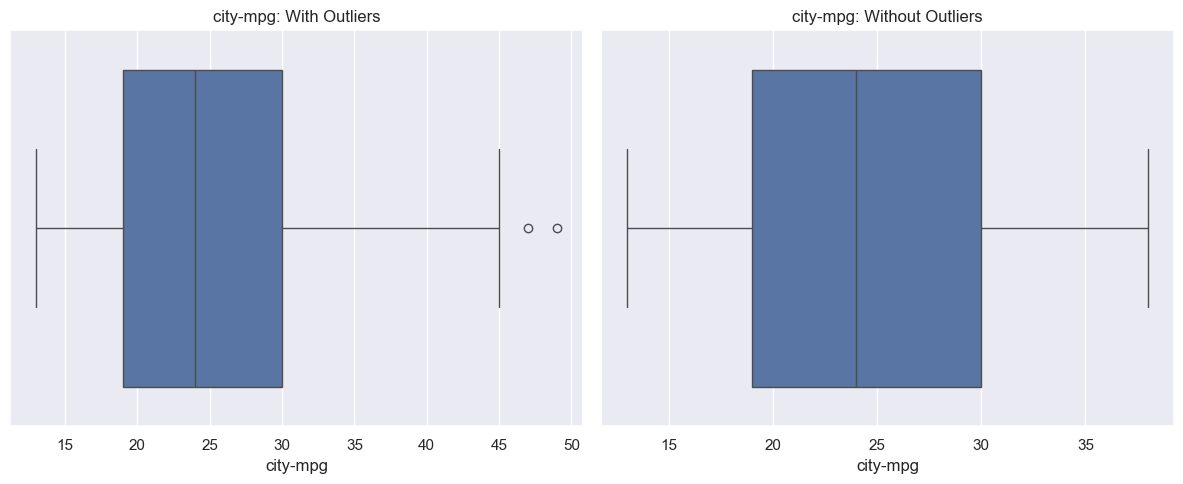

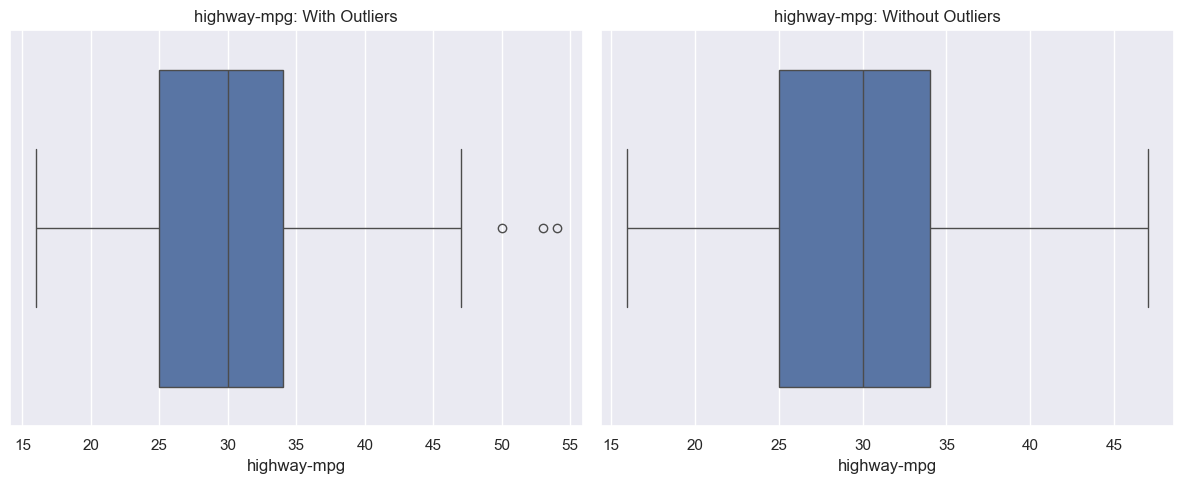

In [33]:
def plot_before_after_outliers(df_original,df_cleaned, column):
    plt.figure(figsize=(12, 5))

    # Plot with outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_original[column])
    plt.title(f'{column}: With Outliers')

    # Plot without outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'{column}: Without Outliers')

    plt.tight_layout()
    plt.show()

# Plot comparisons for each numeric column
for column in numerical_columns:
    if column not in ['width', 'compression-ratio', 'engine-size']:
        plot_before_after_outliers(df,df_cleaned, column)

#### 4.5 Data Transformation, Normalization, Scaling and Feature Engineering

In [25]:
# 4.5.1 Imput numerical columns with the mean
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns
cat_cols = df_cleaned.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

df_cleaned[num_cols] = imputer_num.fit_transform(df_cleaned[num_cols])
df_cleaned[cat_cols] = imputer_cat.fit_transform(df_cleaned[cat_cols])
df_cleaned.isnull().sum()

symboling               0
normalized-losses       0
make                    0
fuel-type               0
aspiration              0
num-of-doors            0
body-style              0
drive-wheels            0
engine-location         0
wheel-base              0
length                  0
width                   0
height                  0
curb-weight             0
engine-type             0
num-of-cylinders        0
engine-size             0
fuel-system             0
bore                    0
stroke                  0
compression-ratio       0
horsepower              0
peak-rpm                0
city-mpg                0
highway-mpg             0
price                   0
normalized_losses_na    0
dtype: int64

In [26]:
#drop the normalized-losses column
df_cleaned.drop('normalized_losses_na', axis=1, inplace=True)

# 4.5.2 Catgorical columns encoding
# We will use LabelEncoder for this task
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# 4.5.3 Verify the results
print("Data proccesed:\n", df_cleaned.head())

Data proccesed:
    symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0        3.0          122.05625     0          1           0             1   
1        3.0          122.05625     0          1           0             1   
2        1.0          122.05625     0          1           0             1   
3        2.0          164.00000     1          1           0             0   
4        2.0          164.00000     1          1           0             0   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0           0             2                0        88.6  ...        130.0   
1           0             2                0        88.6  ...        130.0   
2           2             2                0        94.5  ...        152.0   
3           3             1                0        99.8  ...        109.0   
4           3             0                0        99.4  ...        136.0   

   fuel-system  bore  stroke  compression-rat

### 5. Training protocol

In this section, we will split the data into training and testing sets, preprocess the data, and train a machine learning model to predict the insurance risk rating of a car. The steps include:

- Data Splitting: Divide the dataset into training and testing sets to evaluate the model's performance.
- Data Preprocessing: Normalize or scale the data as needed, encode categorical variables, and handle any missing values.
- Feature Selection: Identify the most important features for predicting the insurance risk rating.

In [27]:
# Fix the target variable (symboling) by shifting the values to start from 0
df_cleaned['symboling'] = df_cleaned['symboling'] - df_cleaned['symboling'].min()
# We do this to make the target variable start from 0.

# Define the columns to use in the model
# Are target column is the caterogical column 'symboling' wich is the risk rating of the car
X = df_cleaned.drop('symboling', axis=1)  # Delete the target column
Y = df_cleaned['symboling']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    float64
 1   normalized-losses  199 non-null    float64
 2   make               199 non-null    int64  
 3   fuel-type          199 non-null    int64  
 4   aspiration         199 non-null    int64  
 5   num-of-doors       199 non-null    int64  
 6   body-style         199 non-null    int64  
 7   drive-wheels       199 non-null    int64  
 8   engine-location    199 non-null    int64  
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    float64
 14  engine-type        199 non-null    int64  
 15  num-of-cylinders   199 non-null    int64  
 16  engine-size        199 non-null

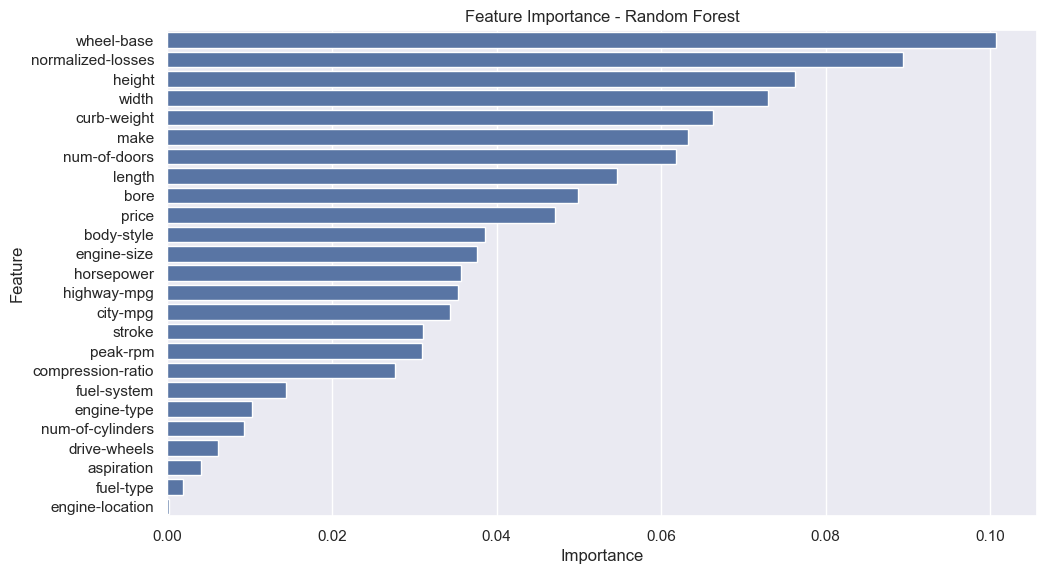

In [28]:
# Fit RandomForestClassifier to get feature importances
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X, Y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importance - Random Forest")
plt.show()

In [29]:
# Remove the less important features
X_train = X_train.drop(['engine-location', 'fuel-type', 'aspiration', 'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system'], axis=1)
X_test = X_test.drop(['engine-location', 'fuel-type', 'aspiration', 'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system'], axis=1)

### 6. Model Training and Evaluation

In [30]:
def evaluate_classification_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, predictions)}")
    print(f"Classification Report:\n {classification_report(y_test, predictions)}\n")
    return accuracy

In [38]:
lr_model = LogisticRegression(max_iter=1000)
accuracy_lr = evaluate_classification_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)

# 2. Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
accuracy_rf = evaluate_classification_model(rf_model, X_train, X_test, y_train, y_test)

# 3. XGBoost Classifier Model
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42)
accuracy_xgb = evaluate_classification_model(xgb_model, X_train, X_test, y_train, y_test)

Model: LogisticRegression
Accuracy: 0.65
Confusion Matrix:
 [[ 0  1  1  0  0  0]
 [ 0  4  3  0  0  0]
 [ 0  1 16  1  1  0]
 [ 0  0  3  7  1  0]
 [ 0  0  0  2  5  0]
 [ 0  0  0  4  3  7]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.67      0.57      0.62         7
         2.0       0.70      0.84      0.76        19
         3.0       0.50      0.64      0.56        11
         4.0       0.50      0.71      0.59         7
         5.0       1.00      0.50      0.67        14

    accuracy                           0.65        60
   macro avg       0.56      0.54      0.53        60
weighted avg       0.68      0.65      0.64        60




/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: RandomForestClassifier
Accuracy: 0.7666666666666667
Confusion Matrix:
 [[ 0  2  0  0  0  0]
 [ 0  5  2  0  0  0]
 [ 0  0 17  2  0  0]
 [ 0  1  0  9  0  1]
 [ 0  0  0  2  5  0]
 [ 0  0  0  4  0 10]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.62      0.71      0.67         7
         2.0       0.89      0.89      0.89        19
         3.0       0.53      0.82      0.64        11
         4.0       1.00      0.71      0.83         7
         5.0       0.91      0.71      0.80        14

    accuracy                           0.77        60
   macro avg       0.66      0.64      0.64        60
weighted avg       0.78      0.77      0.76        60




/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: XGBClassifier
Accuracy: 0.7
Confusion Matrix:
 [[ 1  1  0  0  0  0]
 [ 0  5  2  0  0  0]
 [ 0  1 15  3  0  0]
 [ 0  1  1  8  0  1]
 [ 0  0  0  2  5  0]
 [ 0  1  0  3  2  8]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.56      0.71      0.62         7
         2.0       0.83      0.79      0.81        19
         3.0       0.50      0.73      0.59        11
         4.0       0.71      0.71      0.71         7
         5.0       0.89      0.57      0.70        14

    accuracy                           0.70        60
   macro avg       0.75      0.67      0.68        60
weighted avg       0.74      0.70      0.71        60




Confusion Matrix - Logistic Regression:


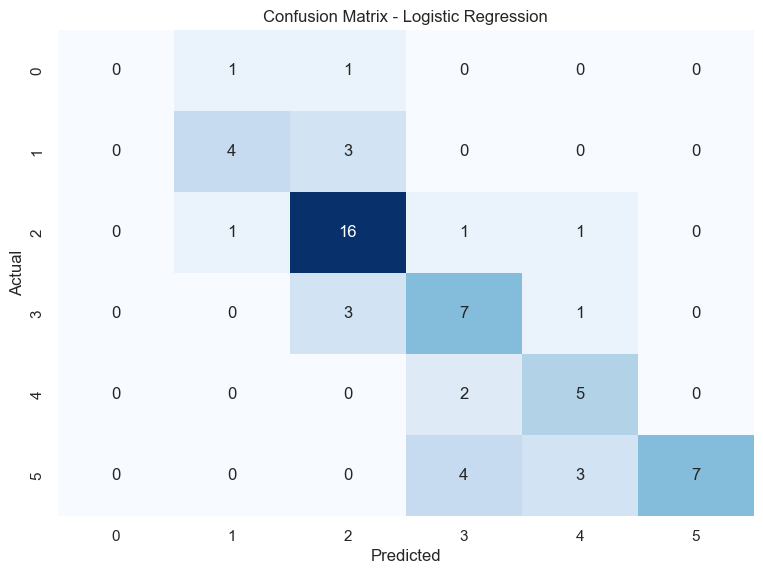

Confusion Matrix - Random Forest Classifier:


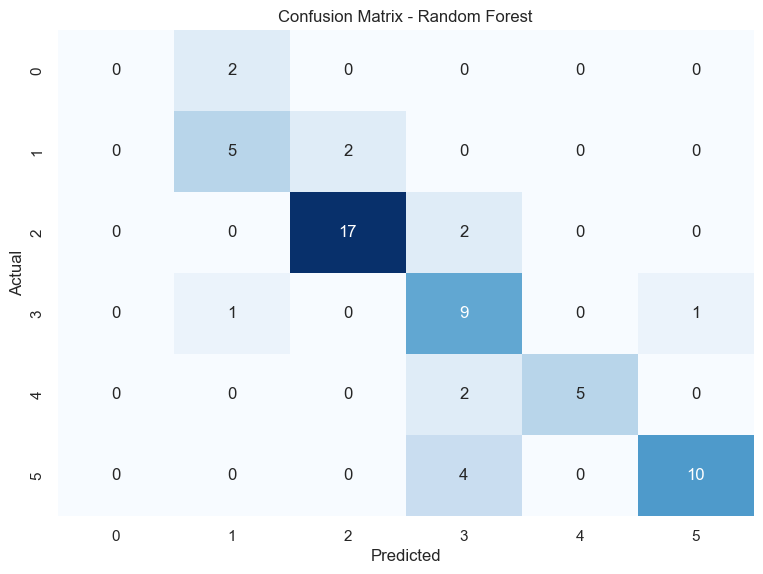

Confusion Matrix - XGBoost Classifier:


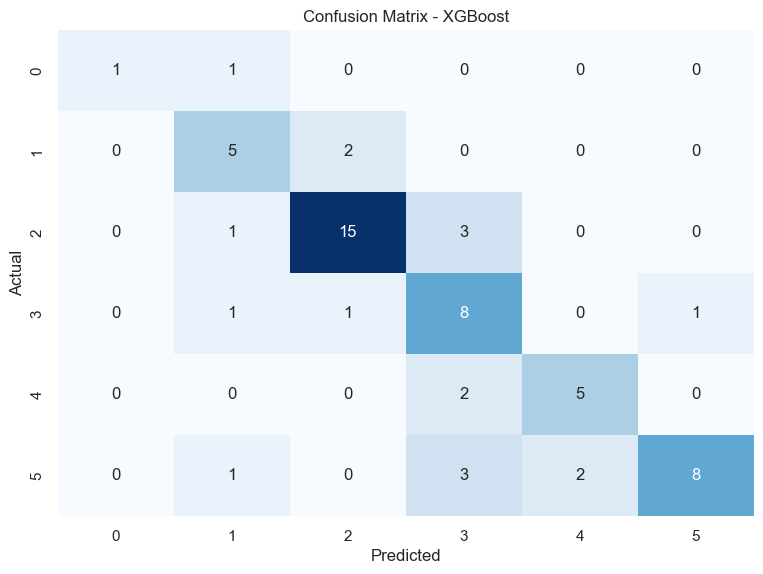

ROC-AUC Curve - Logistic Regression:


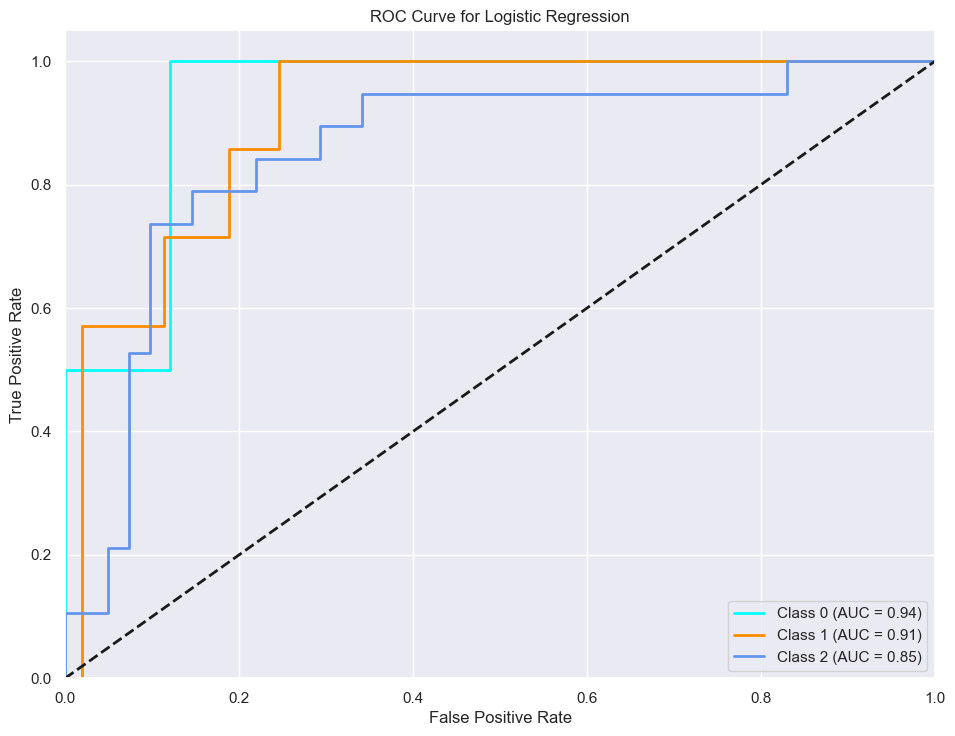

ROC-AUC Curve - Random Forest Classifier:


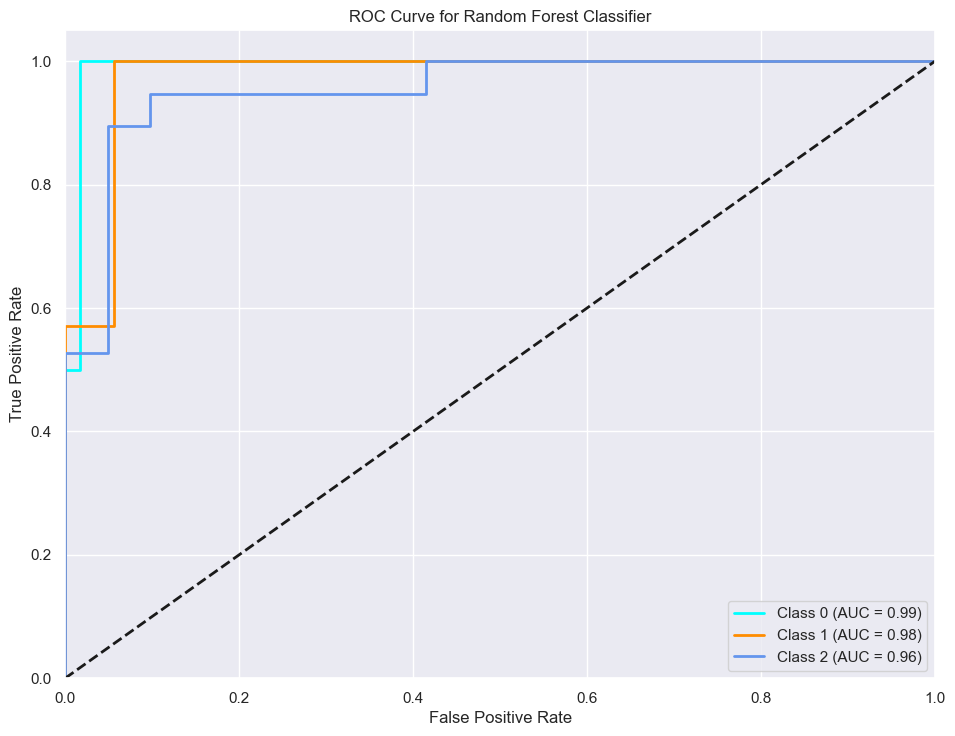

ROC-AUC Curve - XGBoost Classifier:


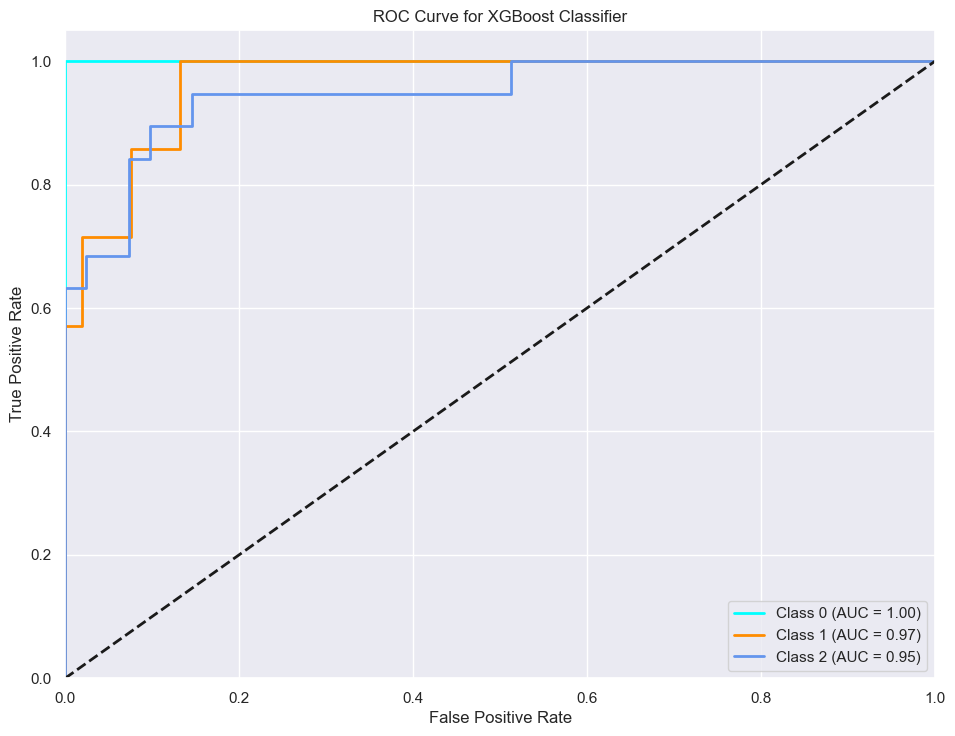

Model Accuracy Comparison:


/var/folders/ml/jw4fkwpd5pl0zq651sqzfz3c0000gn/T/ipykernel_6869/3339047929.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_values, palette="Blues_d")


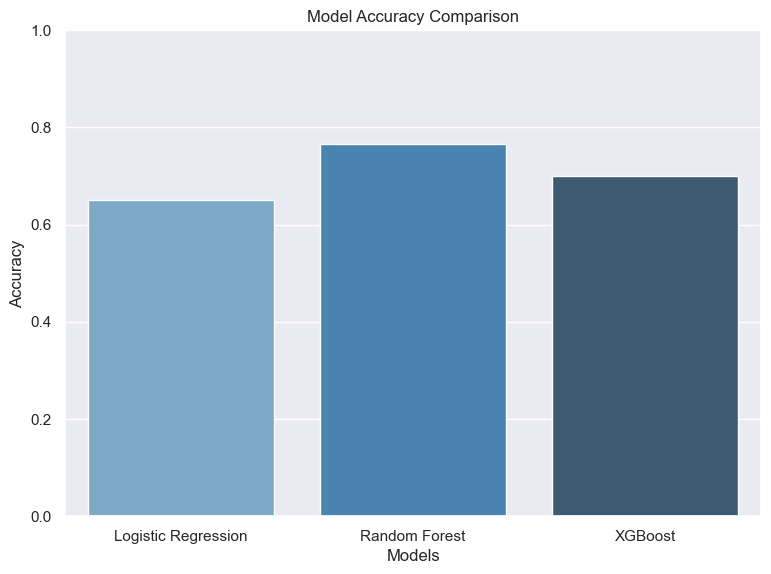

In [39]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrices for each model
print("Confusion Matrix - Logistic Regression:")
plot_confusion_matrix(y_test, lr_model.predict(X_test_scaled), "Logistic Regression")

print("Confusion Matrix - Random Forest Classifier:")
plot_confusion_matrix(y_test, rf_model.predict(X_test), "Random Forest")

print("Confusion Matrix - XGBoost Classifier:")
plot_confusion_matrix(y_test, xgb_model.predict(X_test), "XGBoost")

# For multiclass models, we can plot the ROC-AUC curve for each class

# Binarize the target variable to plot the ROC curve for each model
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

def plot_roc_auc(model, X_test, y_test_bin, model_name):
    y_score = model.predict_proba(X_test)

    # ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# ROC-AUC for Logistic Regression
print("ROC-AUC Curve - Logistic Regression:")
plot_roc_auc(lr_model, X_test_scaled, y_test_bin, "Logistic Regression")

# ROC-AUC for Random Forest
print("ROC-AUC Curve - Random Forest Classifier:")
plot_roc_auc(rf_model, X_test, y_test_bin, "Random Forest Classifier")

# ROC-AUC for XGBoost
print("ROC-AUC Curve - XGBoost Classifier:")
plot_roc_auc(xgb_model, X_test, y_test_bin, "XGBoost Classifier")

# Plot to compare the accuracies of the models
def plot_model_accuracies():
    accuracies = {
        "Logistic Regression": accuracy_lr,
        "Random Forest": accuracy_rf,
        "XGBoost": accuracy_xgb
    }
    model_names = list(accuracies.keys())
    accuracy_values = list(accuracies.values())

    plt.figure(figsize=(8,6))
    sns.barplot(x=model_names, y=accuracy_values, palette="Blues_d")
    plt.title("Model Accuracy Comparison")
    plt.ylabel("Accuracy")
    plt.xlabel("Models")
    plt.ylim(0, 1)
    plt.show()

print("Model Accuracy Comparison:")
plot_model_accuracies()